# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

## TABLE OF CONTENT : 

#### 1. Clean Dataset
#### 2. Descriptive Dataset 

In [1]:
#1 On importe les librairies nécessaires à l'EDA
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.io as pio
import plotly.express as px


# On veut voir toutes les colonnes / lignes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#2 On charge le dataset .L'encodage est pas en UTF-8 donc on ajoute encoding = latin
dataset = pd.read_csv("Speed Dating Data.csv", encoding = 'latin', sep=',')

# On veut voir les informations relatives au dataset
dataset.info()

# On veut voir les premières lignes
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

### 1. Clean Dataset

In [3]:
# On cherche a voir pour quelles colonnes on a trop de valeurs manquantes
Nacount = pd.DataFrame(data = dataset.isnull().sum(), columns= ["Nacount"])
Nacount['Percentage Missing'] = pd.DataFrame(data = 100*dataset.isnull().sum()/dataset.shape[0], columns= ['Percentage Missing'])
Nacount = Nacount.sort_values(by='Percentage Missing', ascending=False)
Nacount.head(60)

,Nacount,Percentage Missing
num_in_3,7710,92.026737
numdat_3,6882,82.143710
expnum,6578,78.515159
sinc7_2,6423,76.665075
amb7_2,6423,76.665075
shar7_2,6404,76.438291
attr7_2,6394,76.318931
intel7_2,6394,76.318931
fun7_2,6394,76.318931
amb5_3,6362,75.936978


In [4]:
# On change le type de la colonne income pour pouvoir travailler dessus
dataset.income = dataset['income'].str.replace(",", "").astype(float)

# On impute les valeurs manquantes de la colonne Income par la moyenne car on voudra la réutiliser plus tard.
dataset['income']=dataset['income'].fillna(dataset['income'].mean())

(8378, 88)

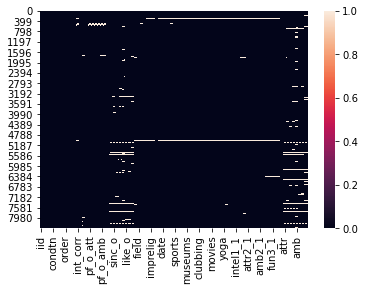

In [5]:
# On souhaite conserver uniquement les colonnes pour lesquelles on a moins de 90% de bonnes valeurs (non nan).
# On va donc supprimer les colonnes contenant exactement 10% ou plus de nan.

seuil = 10.0
min_count = int(((100-seuil)/100)*dataset.shape[0] + 1)
dataset = dataset.dropna(axis=1, thresh=min_count)
sns.heatmap(dataset.isnull())
dataset.shape

In [6]:
# On impute les valeurs (numériques) manquantes de la colonne Income & Age par la moyenne
dataset['income'] = dataset['income'].fillna(dataset['income'].mean())
dataset['age'] = dataset['age'].fillna(dataset['age'].mean())

# On impute les valeurs (catégorielles) manquantes de la colonne Income & Age par le mode
dataset['race'] = dataset['race'].fillna(dataset['race'].mode()[0])
dataset['career_c'] = dataset['career_c'].fillna(dataset['career_c'].mode()[0])

dataset.shape

(8378, 88)

### 2. Descriptive Dataset

In [7]:
# Nombre total de participants
nbPeople = dataset['iid'].nunique()
print('Total number of people that participated is: {}'.format(nbPeople))

Total number of people that participated is: 551


Total number of male & female that participated is:
Male      277
Female    274
Name: gender, dtype: int64


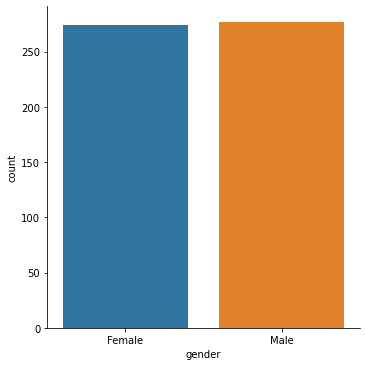

In [8]:
# On compte le nombre d'hommes et femmes

# Cette ligne ça fait le groupBy
dataset_gender = dataset.groupby(['iid', 'gender']).size().reset_index()


# Cette ligne ça remplace les 1 et 0 par les valeurs Homme et Femme via le lambda x dans notre nouveau DF groupé
dataset_gender['gender'] = dataset_gender.gender.apply(lambda x: "Male" if x==1 else "Female" )


print('Total number of male & female that participated is:')
print(dataset_gender.gender.value_counts())

# On affiche dans un barchart
sns.catplot(x='gender', data = dataset_gender, kind= "count")
plt.show()

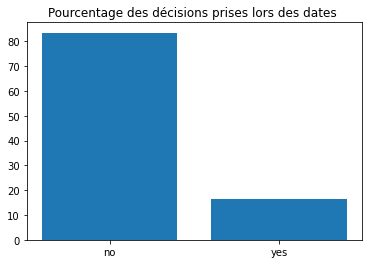

In [9]:
# On va remplacer les valeurs de la colonne match.
dataset_match = dataset.match.apply(lambda x: "yes" if x==1 else "no" )

#Sum des décisions :
dataset_match_count = dataset_match.value_counts()

#Somme des décisions en % :
dataset_match_percent = np.round((dataset_match_count /(dataset_match_count.sum()))*100,2)

# Visualisation des décisions en %
fig, ax = plt.subplots()
ax.bar(dataset_match_percent.index, dataset_match_percent.values)
plt.title("Pourcentage des décisions prises lors des dates ")
plt.show()

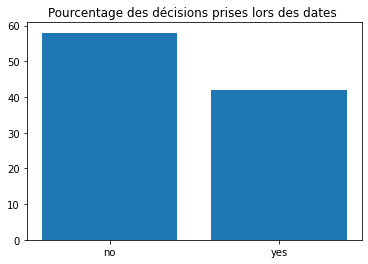

In [10]:
# On va remplacer les valeurs de la colonne décision.
dataset_decision = dataset.dec.apply(lambda x: "yes" if x ==1 else "no")

#Sum des décisions :
dataset_decision_count = dataset_decision.value_counts()

#Somme des décisions en % :
decision_count_percent = np.round((dataset_decision_count /(dataset_decision_count.sum()))*100,2)

# Visualisation des décisions en %
fig, ax = plt.subplots()
ax.bar(decision_count_percent.index, decision_count_percent.values)
plt.title("Pourcentage des décisions prises lors des dates ")
plt.show()

In [11]:
#Importance des variables dans la description des matches
correlation_df = dataset.corr()
abs(correlation_df.match.sort_values(ascending=False))

match       1.000000
dec_o       0.522326
dec         0.521943
like_o      0.305853
like        0.305723
fun_o       0.277700
fun         0.277545
attr_o      0.260837
attr        0.260676
prob_o      0.255574
prob        0.255531
intel       0.169532
intel_o     0.169448
sinc_o      0.164523
sinc        0.164449
amb         0.140042
amb_o       0.139927
clubbing    0.055435
fun3_1      0.051066
fun1_1      0.041652
pf_o_fun    0.041483
yoga        0.036601
attr3_1     0.036439
dining      0.033912
art         0.031545
int_corr    0.031121
exphappy    0.027880
met         0.027670
concerts    0.027034
intel2_1    0.026303
hiking      0.024143
music       0.023093
sports      0.021666
reading     0.020222
income      0.019263
attr2_1     0.016455
pf_o_att    0.015663
museums     0.014954
attr1_1     0.014950
intel1_1    0.014087
pf_o_int    0.013761
gaming      0.013543
samerace    0.013028
amb3_1      0.010592
exercise    0.009470
intel3_1    0.004327
theater     0.000087
amb2_1      0

In [22]:
# On garde uniquement les variables pour lesquelles il y a une corrélation d'au moins 40% avec une autre variable. 
data_corr = dataset[['match', 'dec_o','dec', 'like_o', 'like', 'fun_o', 'fun', 'attr_o', 'attr', 'prob_o', 'prob', 'intel', 'intel_o', 'sinc_o', 'sinc', 'amb','amb_o','clubbing','fun3_1','fun1_1']]
data_corr.head(5)

,match,dec_o,dec,like_o,like,fun_o,fun,attr_o,attr,prob_o,prob,intel,intel_o,sinc_o,sinc,amb,amb_o,clubbing,fun3_1,fun1_1
0,0,0,1,7.0,7.0,8.0,7.0,6.0,6.0,4.0,6.0,7.0,8.0,8.0,9.0,6.0,8.0,5.0,8.0,15.0
1,0,0,1,8.0,7.0,7.0,8.0,7.0,7.0,4.0,5.0,7.0,10.0,8.0,8.0,5.0,7.0,5.0,8.0,15.0
2,1,1,1,10.0,7.0,10.0,8.0,10.0,5.0,10.0,NaN,9.0,10.0,10.0,8.0,5.0,10.0,5.0,8.0,15.0
3,1,1,1,7.0,7.0,8.0,7.0,7.0,7.0,7.0,6.0,8.0,9.0,8.0,6.0,6.0,9.0,5.0,8.0,15.0
4,1,1,1,8.0,6.0,6.0,7.0,8.0,5.0,6.0,6.0,7.0,9.0,7.0,6.0,6.0,9.0,5.0,8.0,15.0


<AxesSubplot:title={'center':'Correlation Heatmap'}>

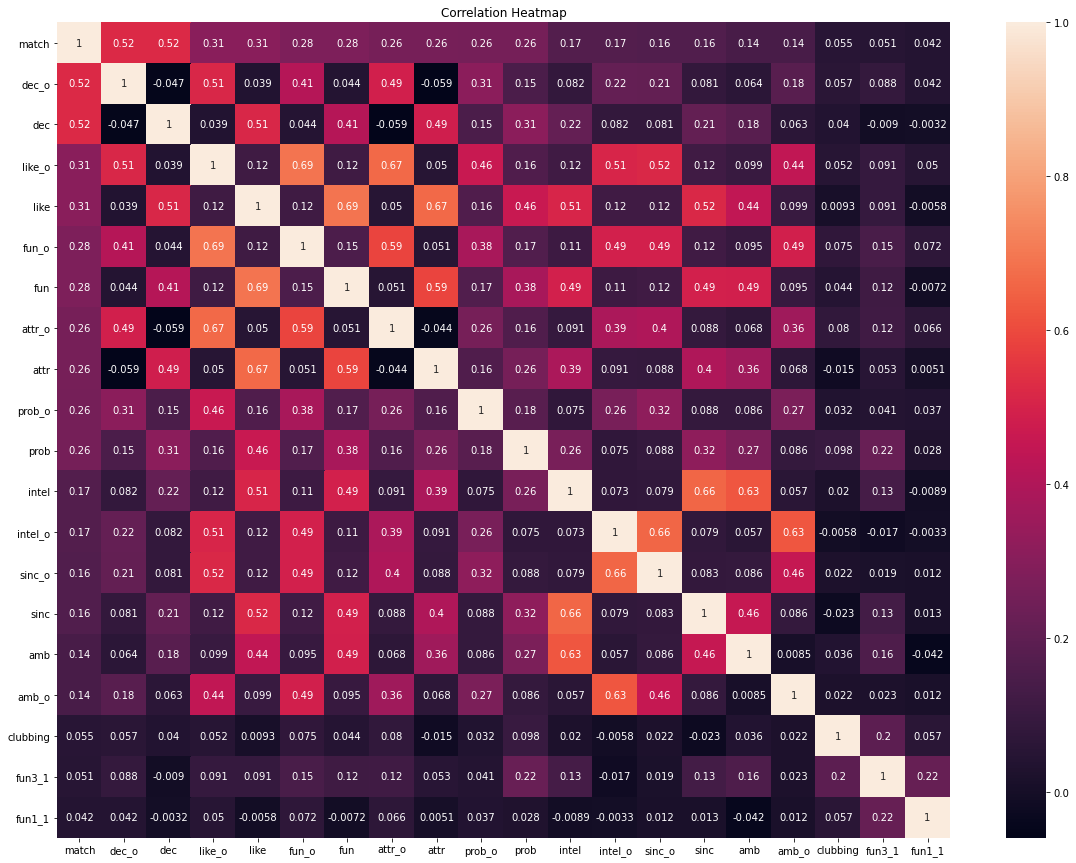

In [24]:
# On affiche tout ça dans une heatmap de correlation
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = data_corr.corr()
max_corr = [max(abs(a[a!=1])) for a in corr.values]
date4 = data_corr.iloc[:,]
corr_high = date4.corr()
sns.heatmap(corr_high, xticklabels=corr_high.columns.values, yticklabels=corr_high.columns.values,annot=True)